In [ ]:
#treating the outliers
#treating the text data
#How to Clean Text With Python
#Normalize Text.
#Remove Unicode Characters.
#Remove Stopwords.
#Perform Stemming and Lemmatization.

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = sns.load_dataset("tips")

In [47]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

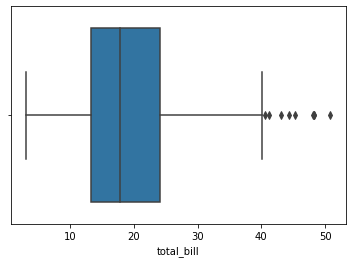

In [48]:
sns.boxplot(df["total_bill"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


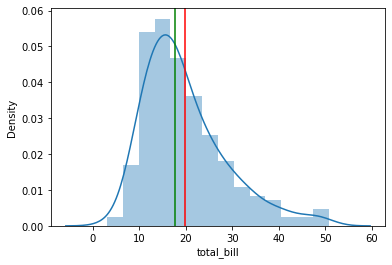

In [52]:
sns.distplot(df["total_bill"])
plt.axvline(df["total_bill"].mean(),color = "red")
plt.axvline(df["total_bill"].median(),color = "green")
#mean > median
#right skewed

In [50]:
df["total_bill"].skew()
#right skewed

1.1332130376158205

In [70]:
#IQR method to treat the outliers
Q1 = df["total_bill"].quantile(0.25)
Q3 = df["total_bill"].quantile(0.75)
IQR = Q3 - Q1
ll = Q1 - 0.75*IQR
ul = Q3 + 0.75*IQR

In [71]:
print("the lower limit is",ll," .The upper limit is",ul)

the lower limit is 5.262500000000003  .The upper limit is 32.21249999999999


In [72]:
df1 = df[(df["total_bill"] > ll) & (df["total_bill"] < ul)]

In [73]:
len(df)

244

In [74]:
len(df1)

218

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

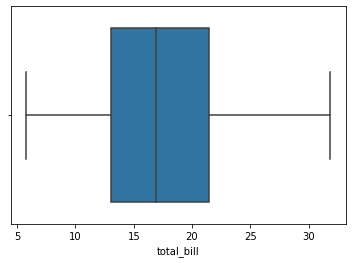

In [75]:
sns.boxplot(df1["total_bill"])

In [76]:
df1["total_bill"].max()

31.85

In [77]:
df["total_bill"].max()

50.81

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

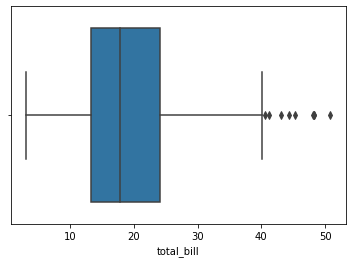

In [78]:
sns.boxplot(df["total_bill"])

In [79]:
df1["total_bill"].skew()

0.43000329524856445

In [80]:
df["total_bill"].skew()

1.1332130376158205

In [ ]:
#Treating the outliers 
#What are the ways to treat outliers
# IQR Method
# Zscore method

In [ ]:
#IQR

In [81]:
sns.load_dataset("titanic")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [82]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [85]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [90]:
df["ztb"]=ss.fit_transform(df[["total_bill"]])

In [91]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,ztb
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [110]:
df2 = df[(df["ztb"]) > -5 & (df['ztb'] <5)]

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

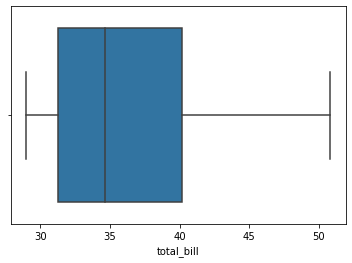

In [111]:
sns.boxplot(df2["total_bill"])

In [97]:
len(df)

244

In [98]:
len(df1)

218

In [112]:
len(df2)

37

In [131]:
df = sns.load_dataset("titanic")

In [ ]:
# identify the null values frequency 
# we want to drop rows or column
# null value imputation for numerical/categorical
# outlier treatment
# encoding to the data
# scaling

In [132]:
(df.isnull().sum()/len(df))*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

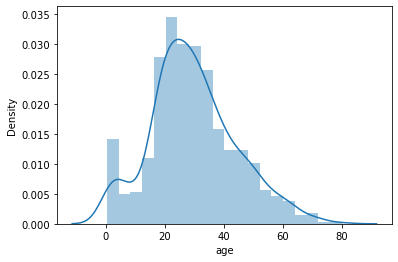

In [133]:
sns.distplot(df["age"])

In [140]:
df["age"].fillna(df["age"].mean(),inplace=True)

In [144]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [143]:
df.drop('deck',axis = 1,inplace =True)

In [146]:
df.dropna(inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x26ae67b4400>,
 'caps': [<matplotlib.lines.Line2D at 0x26ae67b4b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x26ae67b4070>],
 'medians': [<matplotlib.lines.Line2D at 0x26ae67bf280>],
 'fliers': [<matplotlib.lines.Line2D at 0x26ae67bf610>],
 'means': []}

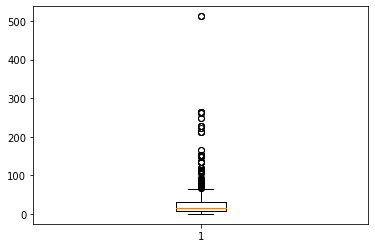

In [151]:
plt.boxplot(df["fare"])

In [152]:
len(df)

889

In [154]:
df["fare"].skew()

4.801440211044194

In [153]:

ll = -26.7605
ul =  65.6563

In [157]:
df1 = df[(df["fare"]>ll) & (df["fare"]<ul)]

In [159]:
df1["fare"].skew()

1.4306715336945985

In [160]:
len(df1)

775

{'whiskers': [<matplotlib.lines.Line2D at 0x26ae680e880>,
 'caps': [<matplotlib.lines.Line2D at 0x26ae680efa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26ae680e5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x26ae681a700>],
 'fliers': [<matplotlib.lines.Line2D at 0x26ae681aa90>],
 'means': []}

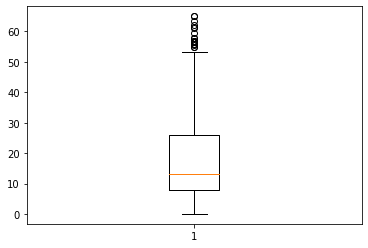

In [161]:
plt.boxplot(df1["fare"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

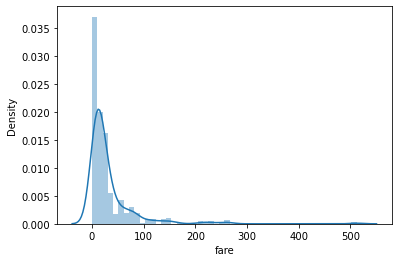

In [162]:
sns.distplot(df["fare"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

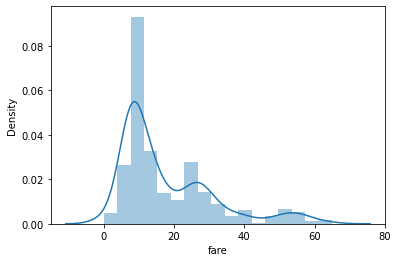

In [163]:
sns.distplot(df1["fare"])

<AxesSubplot:>

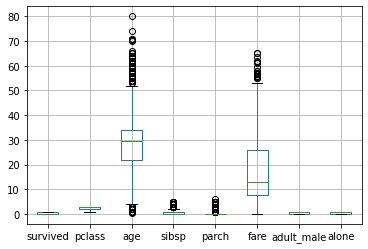

In [165]:
df1.boxplot()

In [168]:

ll = 2.5 
ul = 54.5
df2 = df1[(df1["age"]>ll) & (df1["age"]<ul)]

In [171]:
len(df2)

721

In [172]:
df1["age"].skew()

0.435011505469427

In [173]:
df2["age"].skew()

0.015117984923116801

<AxesSubplot:>

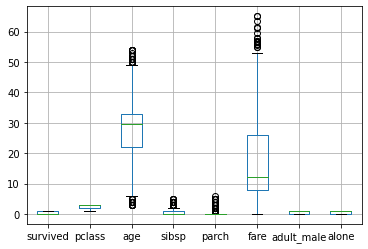

In [174]:
df2.boxplot()

<AxesSubplot:>

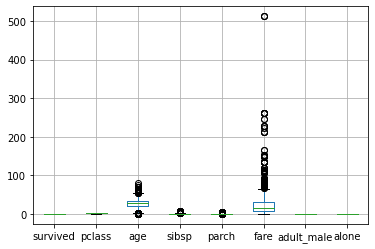

In [166]:
df.boxplot()

In [175]:
df2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [180]:
df2["parch"].value_counts(normalize = True)*100

0    80.305132
1    11.234397
2     6.518724
5     0.693481
3     0.693481
4     0.416089
6     0.138696
Name: parch, dtype: float64

In [185]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290,-0.555520,-0.206207
pclass,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193,0.090098,0.138553
age,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604,0.258966,0.177712
sibsp,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887,-0.255401,-0.584186
parch,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532,-0.351945,-0.583112
fare,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000,-0.179851,-0.274079
adult_male,-0.555520,0.090098,0.258966,-0.255401,-0.351945,-0.179851,1.000000,0.407992
alone,-0.206207,0.138553,0.177712,-0.584186,-0.583112,-0.274079,0.407992,1.000000


In [186]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [1]:
text = "Hey Amazon - my package never arrived https://www.amazon.com/gp/css/order-history?ref_=nav_orders_first FIX THIS ASAP! @AmazonHelp"

text = text.lower()

print(text)

hey amazon - my package never arrived https://www.amazon.com/gp/css/order-history?ref_=nav_orders_first fix this asap! @amazonhelp


In [2]:
import re

text = "hey amazon - my package never arrived https://www.amazon.com/gp/css/order-history?ref_=nav_orders_first please fix asap! @amazonhelp"

text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)

print(text)

hey amazon  my package never arrived  please fix asap amazonhelp


In [15]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')
text = "my package from amazon never arrived fix this asap"
text = " ".join([word for word in text.split() if word not in (stop)])
print(text)

package amazon never arrived fix asap


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
!pip install nltk

In [13]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

words = ["jump", "jumped", "jumps", "jumping"]
stemmer = PorterStemmer()
for word in words:
    print(word + " = " + stemmer.stem(word))

jump = jump
jumped = jump
jumps = jump
jumping = jump


In [37]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet 

lemmatizer = WordNetLemmatizer()
 
print("love :", lemmatizer.lemmatize("loves", wordnet.VERB))
print("loving :", lemmatizer.lemmatize("loving", wordnet.VERB))
print("loved :", lemmatizer.lemmatize("loved", pos=wordnet.VERB))



LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\User/nltk_data'
    - 'C:\\Users\\User\\anaconda3\\nltk_data'
    - 'C:\\Users\\User\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\User\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\User\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
